In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fancyimpute import KNN
from sklearn.impute import KNNImputer
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import plotly.express as px
import statsmodels.api as sm
import math 
from sklearn.metrics import mean_squared_error

In [0]:
train = pd.read_csv("https://raw.githubusercontent.com/iamyumang/Weather_csv/master/Weather_data.csv")

In [703]:
train.shape

(98913, 20)

In [704]:
train.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [0]:
train.columns = train.columns.str.replace(' _', '')

In [706]:
train.isnull().sum()/len(train)*100

datetime_utc      0.000000
conds             0.068747
dewptm            0.625802
fog               0.000000
hail              0.000000
heatindexm       70.569086
hum               0.761275
precipm         100.000000
pressurem         0.233539
rain              0.000000
snow              0.000000
tempm             0.676352
thunder           0.000000
tornado           0.000000
vism              4.464529
wdird            14.538028
wdire            14.538028
wgustm           98.925318
windchillm       99.420703
wspdm             2.378858
dtype: float64

# **Value_Counts**

In [707]:
train["conds"].value_counts()

Haze                             46887
Smoke                            20334
Mist                              8999
Clear                             3129
Widespread Dust                   2830
Fog                               2541
Scattered Clouds                  2197
Partly Cloudy                     2064
Shallow Fog                       1859
Mostly Cloudy                     1520
Light Rain                        1297
Partial Fog                        962
Patches of Fog                     816
Thunderstorms and Rain             471
Light Drizzle                      410
Heavy Fog                          407
Rain                               394
Unknown                            378
Blowing Sand                       358
Overcast                           313
Thunderstorm                       190
Light Thunderstorms and Rain       170
Drizzle                            111
Light Thunderstorm                  63
Light Fog                           52
Heavy Rain               

In [708]:
train["fog"].value_counts()

0    92275
1     6638
Name: fog, dtype: int64

In [709]:
train["hail"].value_counts() 

0    98900
1       13
Name: hail, dtype: int64

In [710]:
train["rain"].value_counts()

0    96292
1     2621
Name: rain, dtype: int64

In [711]:
train["snow"].value_counts()

0    98912
1        1
Name: snow, dtype: int64

In [712]:
train["thunder"].value_counts()

0    97987
1      926
Name: thunder, dtype: int64

In [713]:
train["tornado"].value_counts()

0    98911
1        2
Name: tornado, dtype: int64

In [0]:
train.drop(["precipm", "wgustm", "windchillm", "heatindexm", "wdire"], axis = 1, inplace = True)

In [715]:
train["vism"].loc[4500]

2.0

In [0]:
train["vism"].fillna(value = train["vism"].median(), inplace= True)

# **Outlier Analysis and Missing Value Analysis**

maximum: 5.1
minimum: -0.49999999999999956
IQR: 1.4
no. of outlier: (1503,)


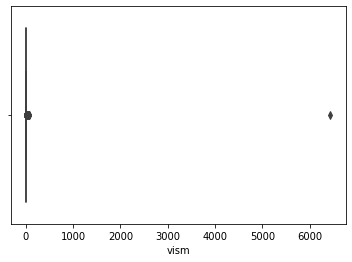

In [717]:
Q1 =  train["vism"].quantile(0.25)
Q3 = train["vism"].quantile(0.75)
IQR = Q3 - Q1
x= (train[(train["vism"] < Q1-1.5*IQR ) | (train["vism"] > Q3+1.5*IQR)]["vism"]).shape
maximum = Q3+1.5*IQR
minimum = Q1-1.5*IQR
print("maximum:", maximum)
print("minimum:", minimum)
print("IQR:", IQR) 
print("no. of outlier:", x)
sns.boxplot("vism", data = train)

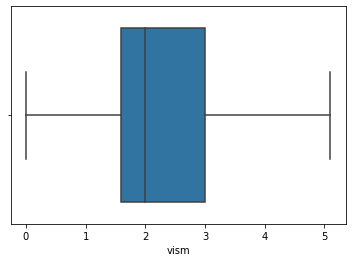

In [718]:
train[train["vism"]> maximum] = maximum
train[train["vism"]< minimum] = minimum
sns.boxplot("vism", data = train)

In [719]:
train["hum"].describe()

count    98171.000000
mean        57.285169
std         24.395560
min          4.000000
25%         38.000000
50%         58.000000
75%         77.000000
max        243.000000
Name: hum, dtype: float64

In [720]:
train["hum"].loc[3450]

56.0

In [0]:
train["hum"].fillna(value = train["hum"].mean(), inplace= True)

maximum: 135.5
minimum: -20.5
IQR: 39.0
no. of outlier: (2,)


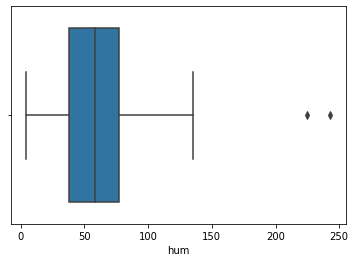

In [722]:
Q1 =  train["hum"].quantile(0.25)
Q3 = train["hum"].quantile(0.75)
IQR = Q3 - Q1
x= (train[(train["hum"] < Q1-1.5*IQR ) | (train["hum"] > Q3+1.5*IQR)]["hum"]).shape
maximum = Q3+1.5*IQR
minimum = Q1-1.5*IQR
print("maximum:", maximum)
print("minimum:", minimum)
print("IQR:", IQR) 
print("no. of outlier:", x)
sns.boxplot("hum", data= train)

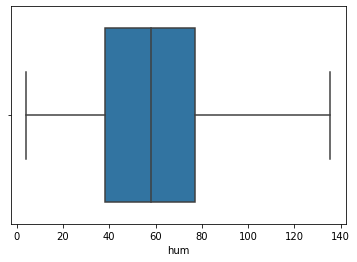

In [723]:
train[train["hum"]> maximum] = maximum
train[train["hum"]< minimum] = minimum
sns.boxplot("hum", data= train)

In [724]:
train["dewptm"].loc[8900]

14.0

In [0]:
train["dewptm"].fillna(value = train["dewptm"].median(), inplace = True)

maximum: 40.0
minimum: -8.0
IQR: 12.0
no. of outlier: (12,)


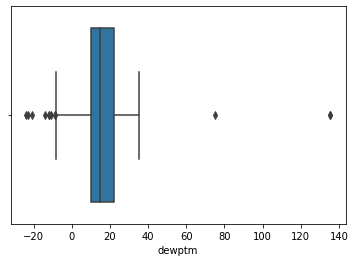

In [726]:
Q1 =  train["dewptm"].quantile(0.25)
Q3 = train["dewptm"].quantile(0.75)
IQR = Q3 - Q1
x= (train[(train["dewptm"] < Q1-1.5*IQR ) | (train["dewptm"] > Q3+1.5*IQR)]["dewptm"]).shape
maximum = Q3+1.5*IQR
minimum = Q1-1.5*IQR
print("maximum:", maximum)
print("minimum:", minimum)
print("IQR:", IQR) 
print("no. of outlier:", x)
sns.boxplot(train["dewptm"])

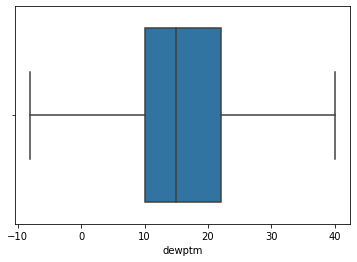

In [727]:
train[train["dewptm"]> maximum] = maximum
train[train["dewptm"]< minimum] = minimum
sns.boxplot("dewptm", data = train)

In [728]:
train.isnull().sum()

datetime_utc        0
conds              66
dewptm              0
fog                 0
hail                0
hum                 0
pressurem         231
rain                0
snow                0
tempm             657
thunder             0
tornado             0
vism                0
wdird           14373
wspdm            2349
dtype: int64

In [729]:
train.head()

,datetime_utc,conds,dewptm,fog,hail,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wspdm
0,19961101-11:00,Smoke,9.0,0.0,0.0,27.0,1010.0,0.0,0.0,30.0,0.0,0.0,5.0,280.0,7.4
1,19961101-12:00,Smoke,10.0,0.0,0.0,32.0,-9999.0,0.0,0.0,28.0,0.0,0.0,2.0,0.0,NaN
2,19961101-13:00,Smoke,11.0,0.0,0.0,44.0,-9999.0,0.0,0.0,24.0,0.0,0.0,2.0,0.0,NaN
3,19961101-14:00,Smoke,10.0,0.0,0.0,41.0,1010.0,0.0,0.0,24.0,0.0,0.0,2.0,0.0,NaN
4,19961101-16:00,Smoke,11.0,0.0,0.0,47.0,1011.0,0.0,0.0,23.0,0.0,0.0,1.2,0.0,0.0


In [730]:
train["wdird"].describe()

count    84540.000000
mean       158.334449
std        120.766891
min         -8.000000
25%         40.000000
50%        140.000000
75%        270.000000
max        960.000000
Name: wdird, dtype: float64

In [731]:
train["wdird"].loc[11950]

180.0

In [0]:
train["wdird"].fillna(train["wdird"].mean(), inplace= True)

maximum: 585.0
minimum: -255.0
IQR: 210.0
no. of outlier: (4,)


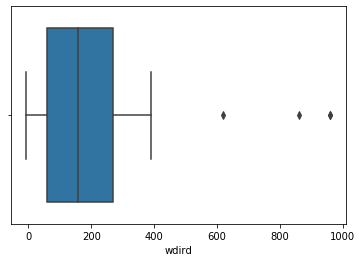

In [733]:
Q1 =  train["wdird"].quantile(0.25)
Q3 = train["wdird"].quantile(0.75)
IQR = Q3 - Q1
x= (train[(train["wdird"] < Q1-1.5*IQR ) | (train["wdird"] > Q3+1.5*IQR)]["wdird"]).shape
maximum = Q3+1.5*IQR
minimum = Q1-1.5*IQR
print("maximum:", maximum)
print("minimum:", minimum)
print("IQR:", IQR) 
print("no. of outlier:", x)
sns.boxplot(train["wdird"])

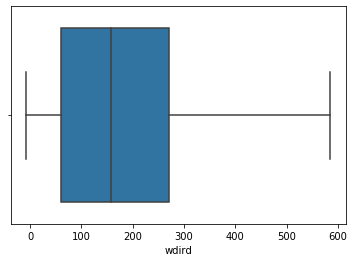

In [734]:
train[train["wdird"]> maximum] = maximum
train[train["wdird"]< minimum] = minimum
sns.boxplot("wdird", data = train)

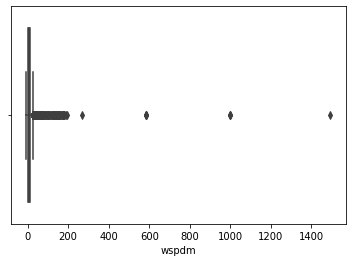

In [735]:
sns.boxplot(train["wspdm"])

In [736]:
train["wspdm"].describe()

count    96564.000000
mean         7.528909
std         11.476530
min         -8.000000
25%          0.000000
50%          5.600000
75%         11.100000
max       1492.700000
Name: wspdm, dtype: float64

In [737]:
train["wspdm"].loc[14500]

7.4

In [0]:
train["wspdm"].fillna(train["wspdm"].mean(), inplace= True)

maximum: 27.75
minimum: -16.65
IQR: 11.1
no. of outlier: (1333,)


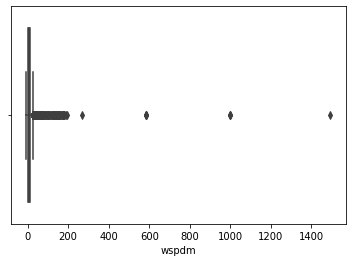

In [739]:
Q1 =  train["wspdm"].quantile(0.25)
Q3 = train["wspdm"].quantile(0.75)
IQR = Q3 - Q1
x= (train[(train["wspdm"] < Q1-1.5*IQR ) | (train["wspdm"] > Q3+1.5*IQR)]["wspdm"]).shape
maximum = Q3+1.5*IQR
minimum = Q1-1.5*IQR
print("maximum:", maximum)
print("minimum:", minimum)
print("IQR:", IQR) 
print("no. of outlier:", x)
sns.boxplot(train["wspdm"])

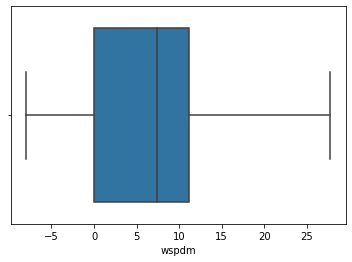

In [740]:
train[train["wspdm"]> maximum] = maximum
train[train["wspdm"]< minimum] = minimum
sns.boxplot("wspdm", data = train)

In [741]:
train.isnull().sum()

datetime_utc      0
conds            42
dewptm            0
fog               0
hail              0
hum               0
pressurem       230
rain              0
snow              0
tempm           578
thunder           0
tornado           0
vism              0
wdird             0
wspdm             0
dtype: int64

In [0]:
train.dropna(subset=['conds','pressurem', 'tempm'],inplace=True)
train.reset_index(inplace= True)

In [743]:
train.head()

,index,datetime_utc,conds,dewptm,fog,hail,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wspdm
0,0,19961101-11:00,Smoke,9.0,0.0,0.0,27.0,1010.0,0.0,0.0,30.0,0.0,0.0,5.0,280.0,7.400000
1,1,19961101-12:00,Smoke,10.0,0.0,0.0,32.0,-9999.0,0.0,0.0,28.0,0.0,0.0,2.0,0.0,7.528909
2,2,19961101-13:00,Smoke,11.0,0.0,0.0,44.0,-9999.0,0.0,0.0,24.0,0.0,0.0,2.0,0.0,7.528909
3,3,19961101-14:00,Smoke,10.0,0.0,0.0,41.0,1010.0,0.0,0.0,24.0,0.0,0.0,2.0,0.0,7.528909
4,4,19961101-16:00,Smoke,11.0,0.0,0.0,47.0,1011.0,0.0,0.0,23.0,0.0,0.0,1.2,0.0,0.000000


**One hot coding**

In [744]:
dummies = pd.get_dummies(train.conds)
dummies.head()

,-8.0,5.1,27.75,Blowing Sand,Clear,Drizzle,Fog,Funnel Cloud,Haze,Heavy Fog,Heavy Rain,Heavy Thunderstorms and Rain,Heavy Thunderstorms with Hail,Light Drizzle,Light Fog,Light Hail Showers,Light Haze,Light Rain,Light Rain Showers,Light Sandstorm,Light Thunderstorm,Light Thunderstorms and Rain,Mist,Mostly Cloudy,Overcast,Partial Fog,Partly Cloudy,Patches of Fog,Rain,Scattered Clouds,Shallow Fog,Smoke,Thunderstorm,Thunderstorms and Rain,Thunderstorms with Hail,Unknown,Volcanic Ash,Widespread Dust
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [0]:
dummies.drop([-8.0, 5.1, 27.75, "Unknown" ], axis = 1, inplace = True)

In [746]:
merged = pd.concat([train, dummies], axis = "columns")
merged.head()

,index,datetime_utc,conds,dewptm,fog,hail,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wspdm,Blowing Sand,Clear,Drizzle,Fog,Funnel Cloud,Haze,Heavy Fog,Heavy Rain,Heavy Thunderstorms and Rain,Heavy Thunderstorms with Hail,Light Drizzle,Light Fog,Light Hail Showers,Light Haze,Light Rain,Light Rain Showers,Light Sandstorm,Light Thunderstorm,Light Thunderstorms and Rain,Mist,Mostly Cloudy,Overcast,Partial Fog,Partly Cloudy,Patches of Fog,Rain,Scattered Clouds,Shallow Fog,Smoke,Thunderstorm,Thunderstorms and Rain,Thunderstorms with Hail,Volcanic Ash,Widespread Dust
0,0,19961101-11:00,Smoke,9.0,0.0,0.0,27.0,1010.0,0.0,0.0,30.0,0.0,0.0,5.0,280.0,7.400000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,19961101-12:00,Smoke,10.0,0.0,0.0,32.0,-9999.0,0.0,0.0,28.0,0.0,0.0,2.0,0.0,7.528909,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2,19961101-13:00,Smoke,11.0,0.0,0.0,44.0,-9999.0,0.0,0.0,24.0,0.0,0.0,2.0,0.0,7.528909,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,3,19961101-14:00,Smoke,10.0,0.0,0.0,41.0,1010.0,0.0,0.0,24.0,0.0,0.0,2.0,0.0,7.528909,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,4,19961101-16:00,Smoke,11.0,0.0,0.0,47.0,1011.0,0.0,0.0,23.0,0.0,0.0,1.2,0.0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [747]:
final = merged.drop(['conds','Widespread Dust', 'index'], axis = 'columns')
final.head()

,datetime_utc,dewptm,fog,hail,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wspdm,Blowing Sand,Clear,Drizzle,Fog,Funnel Cloud,Haze,Heavy Fog,Heavy Rain,Heavy Thunderstorms and Rain,Heavy Thunderstorms with Hail,Light Drizzle,Light Fog,Light Hail Showers,Light Haze,Light Rain,Light Rain Showers,Light Sandstorm,Light Thunderstorm,Light Thunderstorms and Rain,Mist,Mostly Cloudy,Overcast,Partial Fog,Partly Cloudy,Patches of Fog,Rain,Scattered Clouds,Shallow Fog,Smoke,Thunderstorm,Thunderstorms and Rain,Thunderstorms with Hail,Volcanic Ash
0,19961101-11:00,9.0,0.0,0.0,27.0,1010.0,0.0,0.0,30.0,0.0,0.0,5.0,280.0,7.400000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,19961101-12:00,10.0,0.0,0.0,32.0,-9999.0,0.0,0.0,28.0,0.0,0.0,2.0,0.0,7.528909,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,19961101-13:00,11.0,0.0,0.0,44.0,-9999.0,0.0,0.0,24.0,0.0,0.0,2.0,0.0,7.528909,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,19961101-14:00,10.0,0.0,0.0,41.0,1010.0,0.0,0.0,24.0,0.0,0.0,2.0,0.0,7.528909,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,19961101-16:00,11.0,0.0,0.0,47.0,1011.0,0.0,0.0,23.0,0.0,0.0,1.2,0.0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [0]:
final["datetime_utc"] = pd.to_datetime(final.datetime_utc)

In [749]:
final["datetime_utc"].head()

0   1996-11-01 11:00:00
1   1996-11-01 12:00:00
2   1996-11-01 13:00:00
3   1996-11-01 14:00:00
4   1996-11-01 16:00:00
Name: datetime_utc, dtype: datetime64[ns]

In [750]:
final.head()

,datetime_utc,dewptm,fog,hail,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wspdm,Blowing Sand,Clear,Drizzle,Fog,Funnel Cloud,Haze,Heavy Fog,Heavy Rain,Heavy Thunderstorms and Rain,Heavy Thunderstorms with Hail,Light Drizzle,Light Fog,Light Hail Showers,Light Haze,Light Rain,Light Rain Showers,Light Sandstorm,Light Thunderstorm,Light Thunderstorms and Rain,Mist,Mostly Cloudy,Overcast,Partial Fog,Partly Cloudy,Patches of Fog,Rain,Scattered Clouds,Shallow Fog,Smoke,Thunderstorm,Thunderstorms and Rain,Thunderstorms with Hail,Volcanic Ash
0,1996-11-01 11:00:00,9.0,0.0,0.0,27.0,1010.0,0.0,0.0,30.0,0.0,0.0,5.0,280.0,7.400000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1996-11-01 12:00:00,10.0,0.0,0.0,32.0,-9999.0,0.0,0.0,28.0,0.0,0.0,2.0,0.0,7.528909,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1996-11-01 13:00:00,11.0,0.0,0.0,44.0,-9999.0,0.0,0.0,24.0,0.0,0.0,2.0,0.0,7.528909,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1996-11-01 14:00:00,10.0,0.0,0.0,41.0,1010.0,0.0,0.0,24.0,0.0,0.0,2.0,0.0,7.528909,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1996-11-01 16:00:00,11.0,0.0,0.0,47.0,1011.0,0.0,0.0,23.0,0.0,0.0,1.2,0.0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [0]:
final_new = final.drop(final[final['datetime_utc'] < "1996-01-01 00:00:00"].index, axis=0)

In [752]:
fig = px.line(final_new, x='datetime_utc', y='tempm')
fig.show()

In [756]:
final_new.tail(5)

,datetime_utc,dewptm,fog,hail,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wspdm,Blowing Sand,Clear,Drizzle,Fog,Funnel Cloud,Haze,Heavy Fog,Heavy Rain,Heavy Thunderstorms and Rain,Heavy Thunderstorms with Hail,Light Drizzle,Light Fog,Light Hail Showers,Light Haze,Light Rain,Light Rain Showers,Light Sandstorm,Light Thunderstorm,Light Thunderstorms and Rain,Mist,Mostly Cloudy,Overcast,Partial Fog,Partly Cloudy,Patches of Fog,Rain,Scattered Clouds,Shallow Fog,Smoke,Thunderstorm,Thunderstorms and Rain,Thunderstorms with Hail,Volcanic Ash
98065,2016-11-30 12:30:00,17.0,0.0,0.0,78.0,1015.0,0.0,0.0,21.0,0.0,0.0,1.5,0.000000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
98066,2016-11-30 13:00:00,16.0,0.0,0.0,83.0,1015.0,0.0,0.0,19.0,0.0,0.0,1.2,0.000000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
98067,2016-11-30 15:00:00,16.0,1.0,0.0,90.0,1016.0,0.0,0.0,17.0,0.0,0.0,1.0,158.334449,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
98068,2016-11-30 18:00:00,14.0,1.0,0.0,96.0,1017.0,0.0,0.0,15.0,0.0,0.0,1.0,158.334449,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
98069,2016-11-30 21:00:00,13.0,0.0,0.0,95.0,1016.0,0.0,0.0,14.0,0.0,0.0,1.0,158.334449,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


**Check weather the data is stationary or not**

In [0]:
from statsmodels.tsa.stattools import adfuller

In [758]:
X = final_new["tempm"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -7.364862
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
Reject Ho - Time Series is Stationary


**Dropping Categrical variable as they are highly imbalanced.**

In [0]:
data = final_new.drop(["datetime_utc","Blowing Sand",	"Clear",	"Drizzle",	"Fog",	"Funnel Cloud",	"Haze",	"Heavy Fog",	"Heavy Rain",	"Heavy Thunderstorms and Rain",	"Heavy Thunderstorms with Hail",	"Light Drizzle",	"Light Fog",	"Light Hail Showers",	"Light Haze",	"Light Rain",	"Light Rain Showers",	"Light Sandstorm"	,"Light Thunderstorm","Mostly Cloudy",	"Overcast",	"Partial Fog"	,"Partly Cloudy",	"Patches of Fog",	"Rain",	"Scattered Clouds",	"Shallow Fog",	"Smoke",	"Thunderstorm",	"Thunderstorms with Hail","Volcanic Ash", "fog","hail", "rain",	"snow", "thunder",	"tornado","Light Thunderstorms and Rain",	"Mist",	"Thunderstorms and Rain"], axis=1)

In [0]:
data.index = final_new.datetime_utc

In [763]:
data.head()

,dewptm,hum,pressurem,tempm,vism,wdird,wspdm
datetime_utc,,,,,,,
1996-11-01 11:00:00,9.0,27.0,1010.0,30.0,5.0,280.0,7.400000
1996-11-01 12:00:00,10.0,32.0,-9999.0,28.0,2.0,0.0,7.528909
1996-11-01 13:00:00,11.0,44.0,-9999.0,24.0,2.0,0.0,7.528909
1996-11-01 14:00:00,10.0,41.0,1010.0,24.0,2.0,0.0,7.528909
1996-11-01 16:00:00,11.0,47.0,1011.0,23.0,1.2,0.0,0.000000


In [0]:
data = data[ ['tempm'] + [ col for col in data.columns if col != 'tempm' ] ]

In [765]:
data.shape

(95225, 7)

In [0]:
cols = data.columns

In [774]:
cols

Index(['tempm', 'dewptm', 'hum', 'pressurem', 'vism', 'wdird', 'wspdm'], dtype='object')

In [767]:
#creating the train and validation set
train = data[:int(0.8*(len(data)))]
valid = data[int(0.8*(len(data))):]

#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train)
model_fit = model.fit()

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning:

y is a deprecated alias for endog, will be removed in version 0.11.0



In [0]:
#converting predictions to dataframe
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
for j in range(0,7):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]


In [0]:
#make final predictions
model = VAR(endog=data)
model_fit = model.fit()
yhat = model_fit.forecast(model_fit.y, steps=1)
print(yhat)